In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



In [12]:
df = pd.read_csv("uber.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [14]:

print(df.isnull().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [15]:
df.dropna(inplace=True)

In [16]:
print(df.isnull().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [17]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [19]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour
df['minute'] = df['pickup_datetime'].dt.minute
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

In [20]:
df.drop(['pickup_datetime', 'key'], axis=1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   fare_amount        199999 non-null  float64
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
 7   year               199999 non-null  int32  
 8   month              199999 non-null  int32  
 9   day                199999 non-null  int32  
 10  hour               199999 non-null  int32  
 11  minute             199999 non-null  int32  
 12  day_of_week        199999 non-null  int32  
dtypes: float64(5), int32(6), int64(2)
memory usage: 16.8 MB


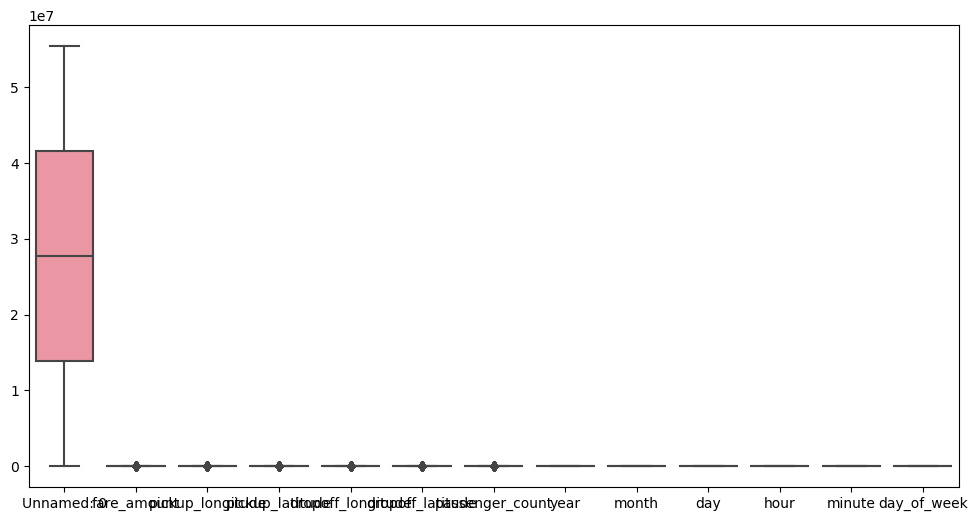

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.show()

In [23]:
for column in df.columns:
    upper_limit = df[column].quantile(0.99)
    lower_limit = df[column].quantile(0.01)
    df = df[(df[column] <= upper_limit) & (df[column] >= lower_limit)]

In [26]:
X = df.drop(['fare_amount'], axis=1)
y = df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)

In [28]:
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, max_features='sqrt', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [29]:
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"R2 Score: {r2}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print("-" * 30)

In [30]:
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")

Linear Regression Performance:
R2 Score: 0.011289217385571981
RMSE: 7.8644090620423155
MAE: 5.11929216823242
MSE: 61.84892989513329
------------------------------
Random Forest Regression Performance:
R2 Score: 0.7014627670024334
RMSE: 4.321462127994443
MAE: 3.0446602490508052
MSE: 18.67503492369026
------------------------------
